MIT License

Copyright (c) 2021 Priyanka Dilip Shinde

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

**Abstract**

Data Pre-processing and Feature selection steps:

*  Loading Libraries
*  Loading Data
*  Data Overview and Summary
*  Data Pre-processing
    *  Dropping Irrelavent Features
    *  Taking care of missing data
    *  Handling Categorical Variables
*   Finding Important Features
*   Distribution of Predictor Variables


About Dataset

*   IDPatientCare_Situation: Care situation of a patient during treatment
*   Diagnosed_Condition: The diagnosed condition of the patient
*   ID_Patient: Patient identifier number
*   Treatmentwithdrugs: Class of drugs used during treatment
*   Survived1year: If the patient survived after one year (0 means did not survive; 1 means survived)
*   Patient_Age: Age of the patient
*   PatientBodyMass_Index: A calculated value based on the patient’s weight, height, etc.
*   Patient_Smoker: If the patient was a smoker or not
*   PatientRuralUrban: If the patient stayed in Rural or Urban part of the country
*   PreviousCondition: Condition of the patient before the start of the treatment ( This variable is splitted into 8 columns - A, B, C, D, E, F, Z and Numberofprevcond. A, B, C, D, E, F and Z are the previous conditions of the patient. Suppose for one patient, if the entry in column A is 1, it means that the previous condition of the patient was A. If the patient didn't have that condition, it is 0 and same for other conditions. If a patient has previous condition as A and C , columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0 respectively. The column Numberofprev_cond will have entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case. )


















In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 9)

In [92]:
data_train = pd.read_csv('https://raw.githubusercontent.com/priyankads/Patient-Survival-After-One-Year-of-Treatment/main/Training_set_intermediate.csv')
data_test = pd.read_csv('https://raw.githubusercontent.com/priyankads/Patient-Survival-After-One-Year-of-Treatment/main/Testing_set_intermediate.csv')

In [93]:
data_train.shape

(23097, 18)

In [94]:
data_test.shape

(9303, 17)

In [95]:
data_train

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23092,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
23093,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
23094,2167,24,7671,DX6,63,27.500039,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
23095,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [96]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

Summary of data:


*   there are total 23097 observations with 16 predictors.
*   Attributes Treated_with_drugs, Patient_Smoker, Patient_Rural_Urban,    Patient_mental_condition are categorical variables.
*   Attributes Treated_with_drugs, A, B, C, D, E, F, Z have missing values.






In [97]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

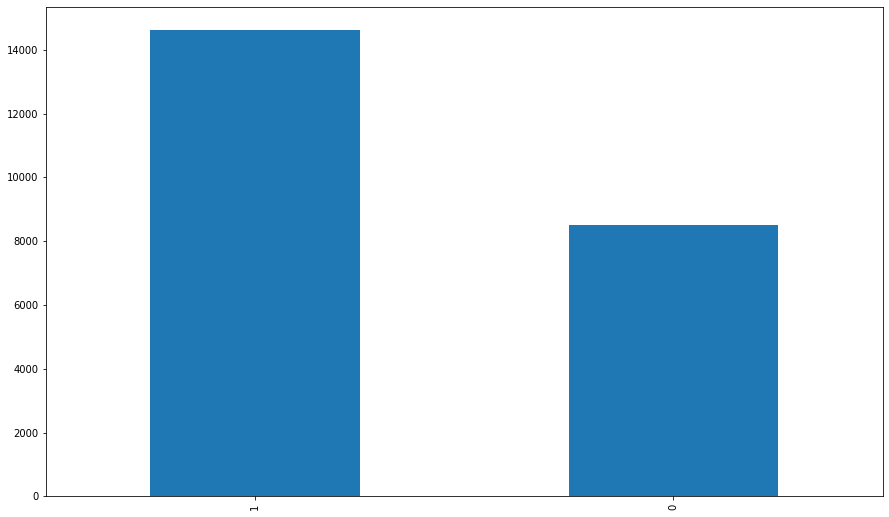

In [98]:
data_train.Survived_1_year.value_counts().plot(kind = 'bar')

# Do the training and test sets have the same data?

**Comparing training and test categorical variables**

In [99]:
data_train.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

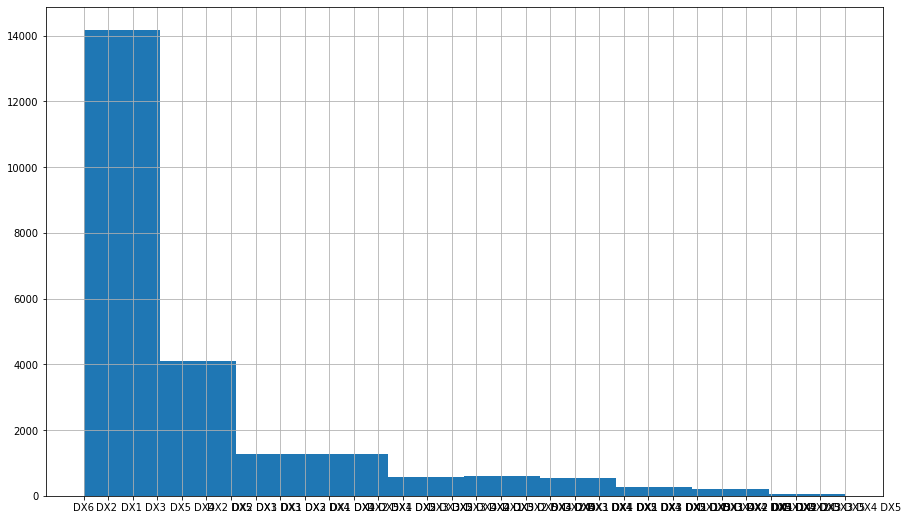

In [100]:
data_train['Treated_with_drugs'].hist()

In [101]:
data_test.Treated_with_drugs.value_counts()

DX6                     3462
DX4                      785
DX5                      782
DX1                      753
DX3                      747
DX2                      745
DX2 DX4                  181
DX2 DX3                  179
DX1 DX5                  166
DX2 DX5                  165
DX3 DX5                  161
DX1 DX2                  160
DX4 DX5                  157
DX1 DX4                  153
DX1 DX3                  152
DX3 DX4                  148
DX1 DX2 DX5               41
DX1 DX3 DX4               41
DX3 DX4 DX5               40
DX2 DX3 DX4               40
DX1 DX2 DX3               40
DX1 DX2 DX4               38
DX2 DX3 DX5               37
DX1 DX4 DX5               34
DX2 DX4 DX5               33
DX1 DX3 DX5               23
DX1 DX3 DX4 DX5           11
DX1 DX2 DX4 DX5            8
DX2 DX3 DX4 DX5            8
DX1 DX2 DX3 DX5            6
DX1 DX2 DX3 DX4            5
DX1 DX2 DX3 DX4 DX5        2
Name: Treated_with_drugs, dtype: int64

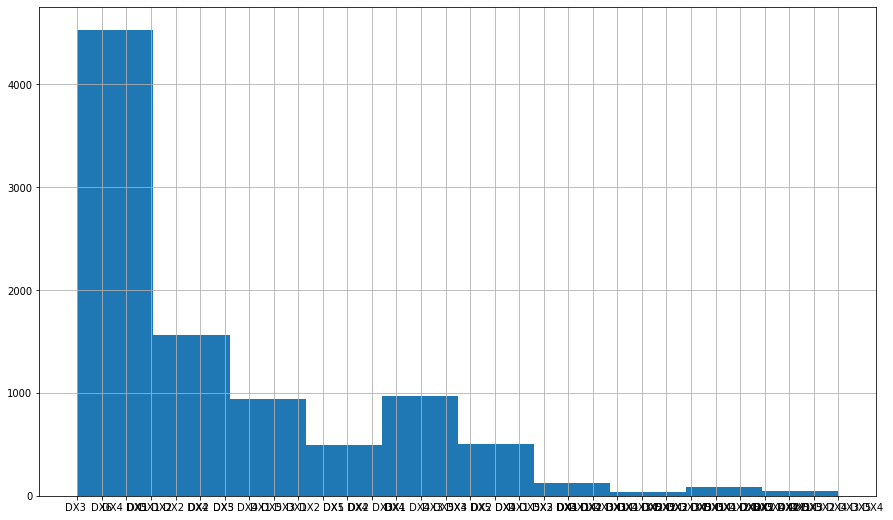

In [102]:
data_test['Treated_with_drugs'].hist()

In [103]:
data_train.Patient_Smoker.unique()

array(['YES', 'NO', 'Cannot say'], dtype=object)

In [104]:
data_test.Patient_Smoker.unique()

array(['NO', 'YES'], dtype=object)

In [105]:
data_train.Patient_Rural_Urban.unique()

array(['URBAN', 'RURAL'], dtype=object)

In [106]:
data_test.Patient_Rural_Urban.unique()

array(['RURAL', 'URBAN'], dtype=object)

In [107]:
data_train.Patient_mental_condition.unique()

array(['Stable'], dtype=object)

In [108]:
data_test.Patient_mental_condition.unique()

array(['Stable'], dtype=object)

here we can see that only the predictor Patient_Smoker have different test and train data.

**Comparing training and test numeric variables**

In [109]:
data_train.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


In [110]:
data_test.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond
count,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.000000,9303.0,9303.000000
mean,16392.542943,26.680426,6226.311620,33.249059,23.429321,0.893260,0.142320,0.183167,0.087284,0.399441,0.052886,0.0,1.758358
std,9531.750578,15.097842,3634.312461,19.477920,3.769305,0.308799,0.349396,0.386824,0.282265,0.489810,0.223818,0.0,0.771230
min,1.000000,1.000000,3.000000,0.000000,17.000695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,8133.000000,14.000000,3073.500000,17.000000,20.166849,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
50%,16281.000000,27.000000,6246.000000,33.000000,23.392495,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
75%,24588.500000,40.000000,9424.000000,50.000000,26.726929,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,2.000000
max,32975.000000,52.000000,12500.000000,66.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,5.000000



   
1.   Patient_Age: train data (0, 149) test data (0, 66)
2.   Patient_Body_Mass_Index: train data (1, 29.9) test data (17, 29.9)






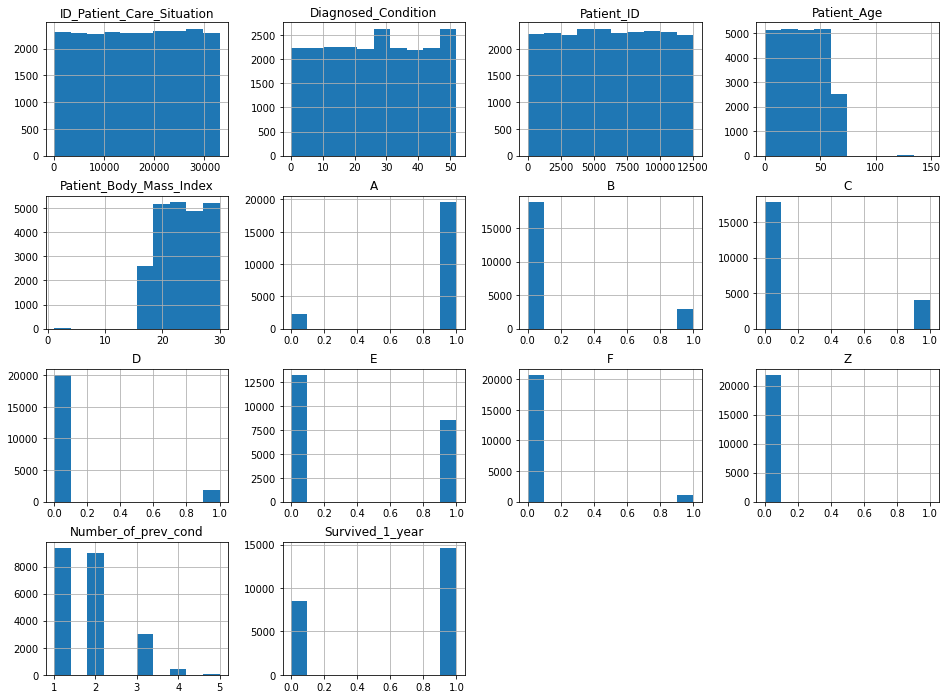

In [111]:
data_train.hist(figsize=(16,12))
plt.show()

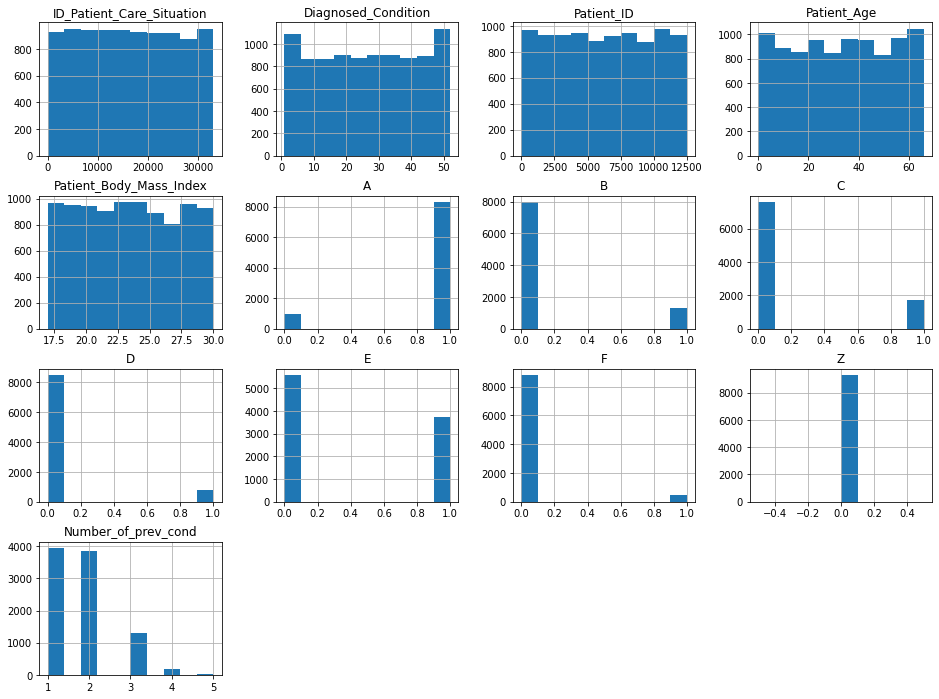

In [112]:
data_test.hist(figsize=(16,12))
plt.show()

# Do the ranges of the predictor variables make sense?

In [113]:
data_train.describe()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


Data Description:

Patient_Age min 0 and max 149 does not make sense.

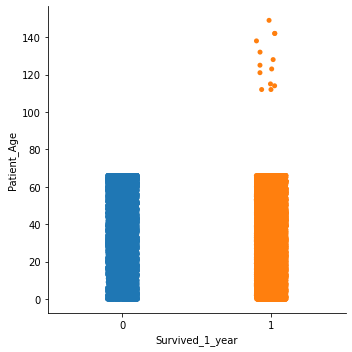

In [114]:
sns.catplot(x="Survived_1_year", y="Patient_Age", data=data_train)

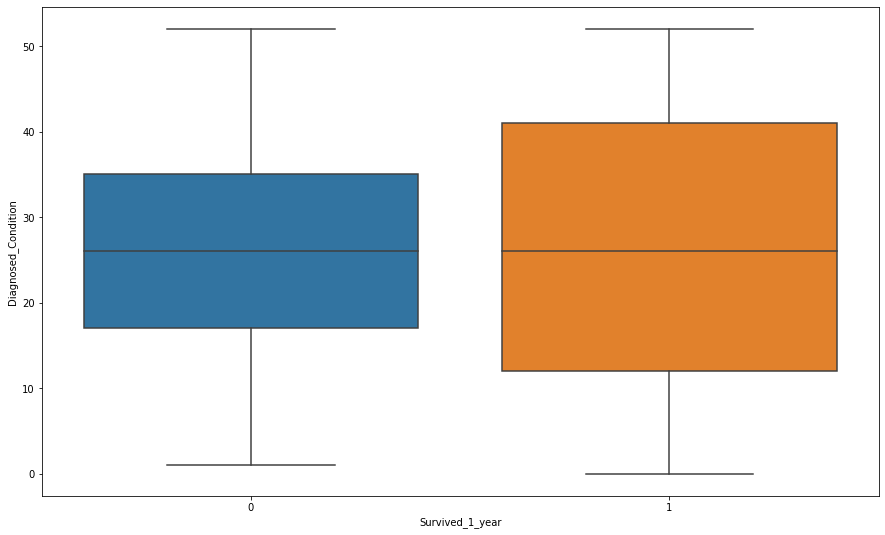

In [115]:
sns.boxplot(data=data_train,x='Survived_1_year',y='Diagnosed_Condition')

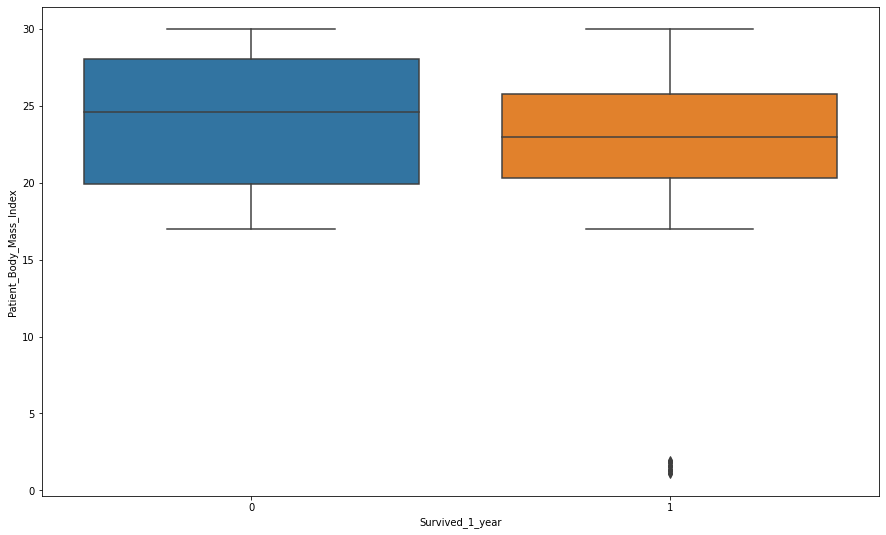

In [116]:
sns.boxplot(data=data_train,x='Survived_1_year',y='Patient_Body_Mass_Index')

# Dropping Irrelevant Features



Here the goal is to predict if the patient survives after one year of treatment and by common sense we can understand that the person cannot survive beacause of his/her patient ID so we can drop this irrelevant feature.

In [117]:
 data_train = data_train.drop(['Patient_ID'], axis = 1) 

# Which independent variables have missing data? How much? 

In [118]:
data_train.isnull().sum() 

ID_Patient_Care_Situation       0
Diagnosed_Condition             0
Treated_with_drugs             13
Patient_Age                     0
Patient_Body_Mass_Index         0
Patient_Smoker                  0
Patient_Rural_Urban             0
Patient_mental_condition        0
A                            1235
B                            1235
C                            1235
D                            1235
E                            1235
F                            1235
Z                            1235
Number_of_prev_cond          1235
Survived_1_year                 0
dtype: int64

As we can see above independent variables Treated_with_drugs, A, B, C, D, E, F, Z and Number_of_prev_cond have 13, 1235, 1235, 1235, 1235, 1235, 1235, 1235, 1235 missing data respectively . 

In [119]:
data_train.isnull().sum() / len(data_train) * 100

ID_Patient_Care_Situation    0.000000
Diagnosed_Condition          0.000000
Treated_with_drugs           0.056284
Patient_Age                  0.000000
Patient_Body_Mass_Index      0.000000
Patient_Smoker               0.000000
Patient_Rural_Urban          0.000000
Patient_mental_condition     0.000000
A                            5.347015
B                            5.347015
C                            5.347015
D                            5.347015
E                            5.347015
F                            5.347015
Z                            5.347015
Number_of_prev_cond          5.347015
Survived_1_year              0.000000
dtype: float64

# Taking care of the missing data

As the percentage of missing data is less, that is 0.056% and 5.347% instead of dropping the rows with missing data we will replace them with mode for columns Treated_with_drugs, A, B, C, D, E, F, Z and with value 0 for column Number_of_prev_cond as we don't know about the number of previous health conditions of patients with nan value and relpacing it with mode will result in inaccurate model.

We will replace the missing values in column Treated_with_drugs with the most frequently occuring value.

In [120]:
data_train.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX3 DX4 DX5           24
DX1 DX2 DX3 DX4           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

In [121]:
data_train.Treated_with_drugs.fillna(value='DX6', axis = 0, inplace = True)

We will replace missing values in column A, B, C, D, E, F, Z with the most frequently occuring value that is mode.

In [122]:
# following code taken from: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/
data_train['A'] = data_train['A'].fillna(data_train['A'].mode()[0])
data_train['B'] = data_train['B'].fillna(data_train['B'].mode()[0])
data_train['C'] = data_train['C'].fillna(data_train['C'].mode()[0])
data_train['D'] = data_train['D'].fillna(data_train['D'].mode()[0])
data_train['E'] = data_train['E'].fillna(data_train['E'].mode()[0])
data_train['F'] = data_train['F'].fillna(data_train['F'].mode()[0])
data_train['Z'] = data_train['Z'].fillna(data_train['Z'].mode()[0])

In [123]:
data_train.Number_of_prev_cond.fillna(value=0, axis = 0, inplace = True)

Checking the sum of missing data.

In [124]:
data_train.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

# Is the predictor variables independent of all the other predictor variables?



Values close to 1 are positively correlated, values close to -1 are negatively correlated and values close to 0 does not have linear relationship with each other.

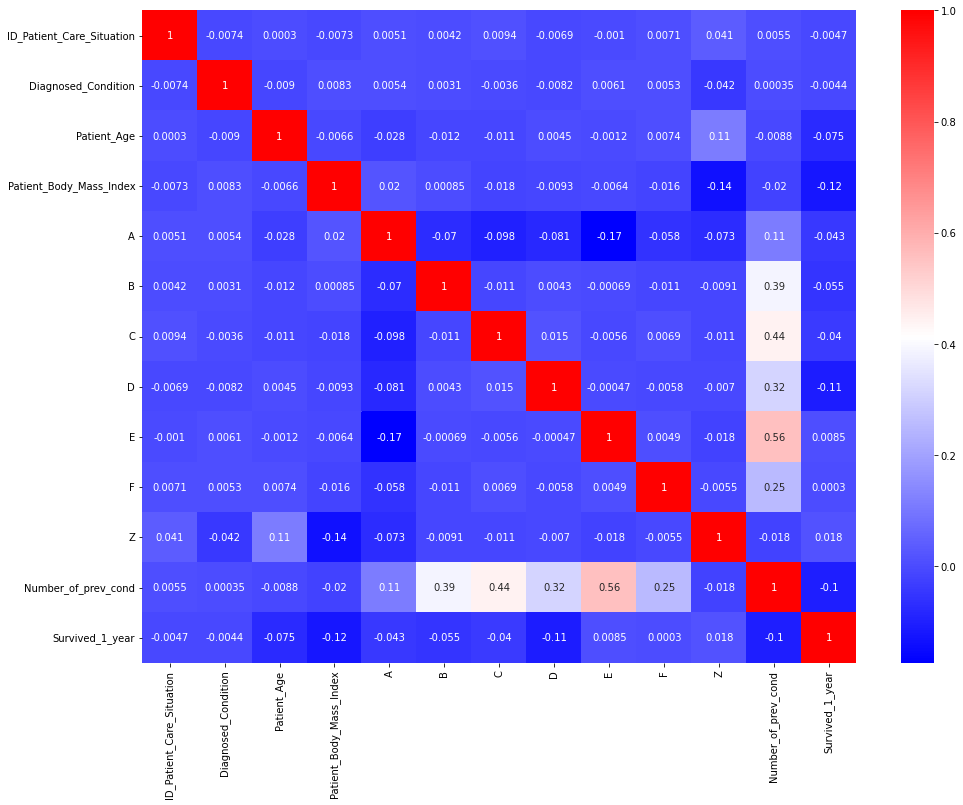

In [125]:
plt.figure(figsize=(16, 12))
sns.heatmap(data_train.corr(), cmap='bwr', annot=True) 


  By looking at the above correlation matrix we can conclude following things:

*   Here correlation coefficient for variables E and Number_of_prev_cond is 0.56 which makes it moderately correlated with each other.
*   No two variables are highly correlated to each other.



In [126]:
corr = data_train.corr()
corr['Survived_1_year'].sort_values(ascending=False)

Survived_1_year              1.000000
Z                            0.018099
E                            0.008466
F                            0.000304
Diagnosed_Condition         -0.004450
ID_Patient_Care_Situation   -0.004685
C                           -0.039701
A                           -0.043404
B                           -0.054560
Patient_Age                 -0.074934
Number_of_prev_cond         -0.101229
D                           -0.107677
Patient_Body_Mass_Index     -0.121844
Name: Survived_1_year, dtype: float64

# Converting categorical variables to numeric 

Encoding categorical variables using one-hot encoding and dummy variables.

In [127]:
data_train['Patient_Smoker'] = data_train['Patient_Smoker'].apply(lambda x: 1 if x == 'YES' else 0)

In [128]:
data_train['Patient_mental_condition'] = data_train['Patient_mental_condition'].apply(lambda y: 1 if y == 'Stable' else 0)

In [129]:
data_train['Patient_Rural_Urban'] = data_train['Patient_Rural_Urban'].apply(lambda y: 1 if y == 'URBAN' else 0)

In [130]:
data_train = pd.get_dummies(data_train, columns=['Treated_with_drugs'])

In [131]:
X = data_train.drop(['Survived_1_year'], axis = 1)   
y = data_train.Survived_1_year  

# Which independent variables are useful to predict a target?

# Which predictor variables are the most important?

In [132]:
#https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
from sklearn.feature_selection import chi2
chi_scores = chi2(X,y)

In [133]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)

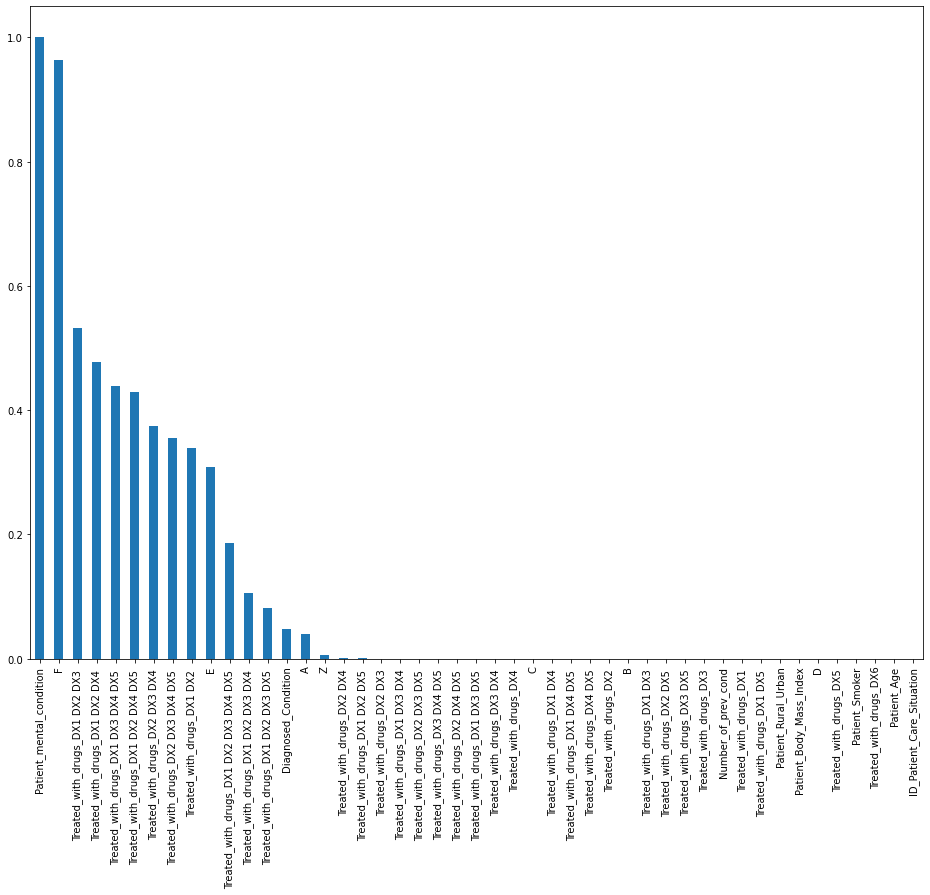

In [134]:
plt.figure(figsize=(16, 12))
p_values.plot.bar()

# What are the distributions of the predictor variables? 

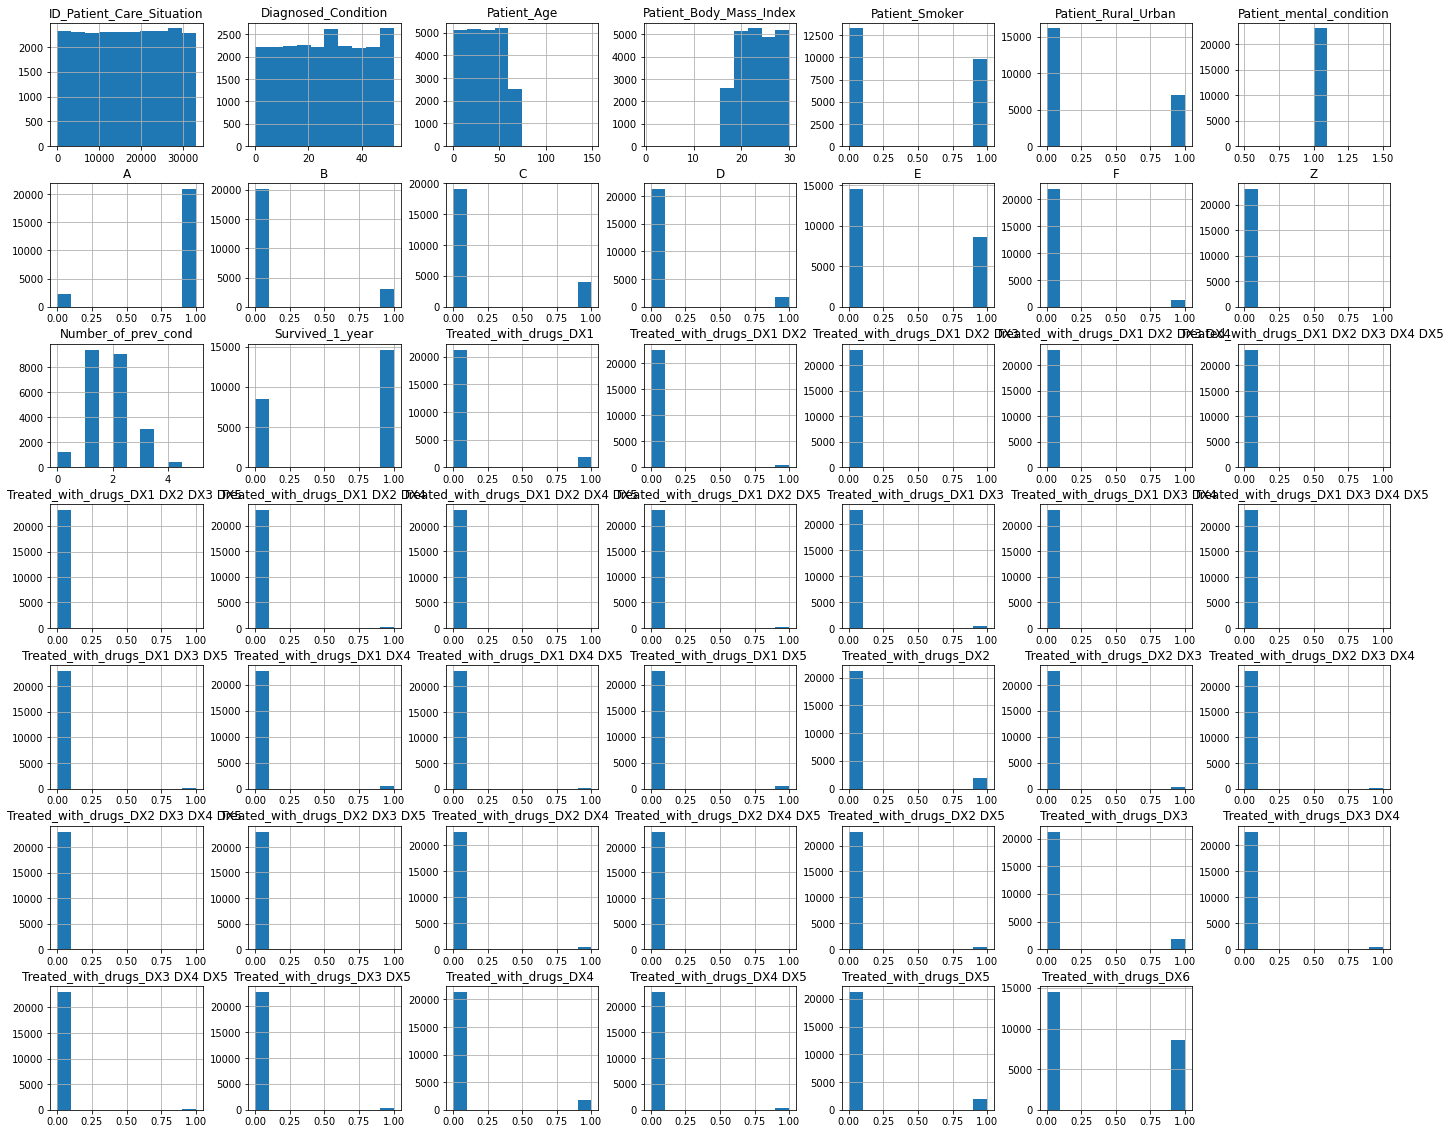

In [90]:
data_train.hist(figsize=(24,20))
plt.show()

Here, Max number of patient have 2 previous health conditions, all patient's mental health is stable, a lot of patients' are from urban area. Attributes Diagnosed_Condition and ID_Patient_Care_Situation have uniform distribution.

**References**


1.   https://www.kaggle.com/rsrishav/patient-survival-after-one-year-of-treatment
2.   https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
1.   https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/






